# Pertemuan 8

- Image Crop 
- Image Resize 
- Image Color Conversion

In [ ]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt

## 1. Image Crop

### 1.1 Basic crop
- crop image pada OpenCV dilakukan dengan menggunakan *numpy slicing*
- dengan notasi `image_array[y_min:y_max , x_min:x_max]`
- dimana `y_min`, `y_max`, `x_min` dan `x_max` merupakan titik pixel batas area yang ingin di crop.

<img src="resource/crop_img.png" style="width: 400px;"></img> <br><br>
<img src="resource/crop_image_2.png" style="width: 350px;"></img>

In [ ]:
img = cv2.imread('Tomat.jpg')

img.shape

In [ ]:
plt.imshow(img[:,:,::-1])

- crop dengan index positif

In [ ]:
# crop image[y_min:y_max, x_min:x_max]

img_crop = img[200:400, 200:400] 

In [ ]:
img_crop.shape

In [ ]:
plt.imshow(img_crop[:,:,::-1])

- crop dengan index negatif

In [ ]:
# crop image[y_min:y_max , x_min:x_max]

img_crop = img[50:-50, 50:-50] 

In [ ]:
plt.imshow(img_crop[:,:,::-1])

In [ ]:
img_crop.shape

### 1.2 read & crop multiple image

In [ ]:
image_list = []
labels = []

DATASET_FOLDER = "Dataset_Tomat/"

for folder in os.listdir(DATASET_FOLDER):
    for file in os.listdir(DATASET_FOLDER + folder):
        img = cv2.imread(DATASET_FOLDER + folder + "/" + file)
        img_crop = img[30:-30, 30:-30]  # crop image 
        image_list.append(img_crop)
        labels.append(folder) # append label (name) of image

In [ ]:
len(image_list)

In [ ]:
labels

In [ ]:
idx = 1

img = image_list[idx]

plt.title(labels[idx])
plt.imshow(img[:,:,::-1])

In [ ]:
idx = 6

img = image_list[idx]

plt.title(labels[idx])
plt.imshow(img[:,:,::-1])

### 1.3 Membuat Class yang didalamnya dapat Read Multiple Image dan Crop Image

In [ ]:
class Preprocessing : 
    def __init__(self, DATASET_FOLDER = "Dataset_Tomat/"):
        self.image_list = []
        self.labels = []
        self.image_crop = []
        self.DATASET_FOLDER = DATASET_FOLDER
        
    def ImageRead(self):
        for folder in os.listdir(DATASET_FOLDER):
            for file in os.listdir(DATASET_FOLDER + folder):
                img = cv2.imread(DATASET_FOLDER + folder + "/" + file)
                self.image_list.append(img)
                self.labels.append(folder) # append label (name) of image
                
    def ImageCrop(self, size=[30,-30,30,-30]):
        for img in self.image_list :
            image_crop = img[size[0]:size[1], size[2]:size[3]] 
            self.image_crop.append(image_crop)

In [ ]:
# create preproces_obj object from Preprocessing class

preproces_obj = Preprocessing(DATASET_FOLDER = "Dataset_Tomat/")

In [ ]:
# call ImageRead() method in preproces_obj object

preproces_obj.ImageRead()

In [ ]:
dir(preproces_obj)

In [ ]:
# display one image from image_list property of preproces_obj object 

img = preproces_obj.image_list[13]

plt.imshow(img[:,:,::-1])

In [ ]:
# call ImageCrop() method in preproces_obj object

preproces_obj.ImageCrop(size=[30,-30,30,-30])

In [ ]:
# display one image from img_list property of preproces_obj object 

img = preproces_obj.image_crop[13]

plt.imshow(img[:,:,::-1])

### Task 
- tambahkan method ImageDisplay() ke class Preprocessing agar bisa menampilkan gambar pada spesifik index 
```
 def ImageDisplay(self, index=0):
     #show image by matplotlib at index
 
 ```

___
### 1.4 display all croped image

In [ ]:
list(range(len(image_list)))

In [ ]:
help(plt.subplot)

In [ ]:
rows = 4
cols = 5
plt.figure(figsize=(20,16))
for i in range(len(image_list)):
    img = image_list[i]
    plt.subplot(rows, cols, i + 1)
    plt.title(labels[i])
    plt.imshow(img[:, :, ::-1])

___
### 1.5 Class Preprocessing dengan penambahan method ImageAllDIsplay()

In [ ]:
class Preprocessing : 
    def __init__(self, DATASET_FOLDER = "Dataset_Tomat/"):
        self.image_list = []
        self.labels = []
        self.image_crop = []
        self.DATASET_FOLDER = DATASET_FOLDER
        
    def ImageRead(self):
        for folder in os.listdir(DATASET_FOLDER):
            for file in os.listdir(DATASET_FOLDER + folder):
                img = cv2.imread(DATASET_FOLDER + folder + "/" + file)
                self.image_list.append(img)
                self.labels.append(folder) # append label (name) of image
                
    def ImageCrop(self, size=[30,-30,30,-30]):
        for img in self.image_list :
            image_crop = img[30:-30, 30:-30] 
            self.image_crop.append(image_crop)
            
    def ImageDisplay(self, index=0):
        img = self.image_crop[index]
        plt.imshow(img[:,:,::-1])
        
    def ImageAllDisplay(self, rows=4, cols=5):
        plt.figure(figsize=(20,16))
        for i in range(len(self.image_list)):

            img = self.image_list[i]
            plt.subplot(rows, cols, i + 1)
            plt.title(self.labels[i])
            plt.imshow(img[:, :, ::-1])
            

In [ ]:
# create preproces_obj object from Preprocessing class

preproces_obj = Preprocessing(DATASET_FOLDER = "Dataset_Tomat/")

preproces_obj.ImageRead()
preproces_obj.ImageCrop(size=[30,-30,30,-30])


In [ ]:
preproces_obj.ImageDisplay(index=10)

In [ ]:
preproces_obj.ImageAllDisplay(rows=4, cols=5)

___
### 1.6 save croped image

 - create folder using `os` library

In [35]:
os.mkdir("croped_tomato") # create folder

- define image filename 

In [36]:
i = 7

labels[i] # labels variable contain image name

'Roma'

In [39]:
i = 7

labels[i] + "_%03d.jpg" % i # name with 3 digit padding number

'Roma_007.jpg'

In [40]:
CROPED_FOLDER = "croped_tomato/"
i = 7

file_name = labels[i] + "_%04d.jpg" % i

CROPED_FOLDER + labels[i] + "/" + file_name

'croped_tomato/Roma/Roma_0007.jpg'

- save croped tomato to folder

In [43]:
list(range(len(image_list)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [49]:
CROPED_FOLDER = "croped_tomato/"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = CROPED_FOLDER + labels[i] + "/"
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # save image
    file_name = labels[i] + "_%03d.jpg" % i
    file_path = CROPED_FOLDER + labels[i] + "/" + file_name
    
    cv2.imwrite(file_path, img)

### Task 
- tambahkan method SaveAllCropedImage() ke class Preprocessing agar bisa menyimpan semua gambar yang di crop ke folder

___

## 2. Image Resize

![](resource/resize.jpg)
- untuk melakukan resize image pada OpenCV diprkenalkan beberapa method berikut :
    - `cv2.resize(img, (w_new, h_new))` : resize `img` ke ukuran `w_new` x `h_new`

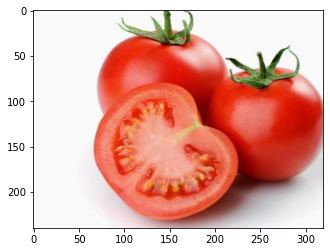

In [50]:
img = cv2.imread('Tomat.jpg')

# resize image (new_widht, new_height)
img_resize = cv2.resize(img, (320, 240))  

# show image 
plt.imshow(img_resize[:,:,::-1])

- resize dengan menggunakan rasio ukuran original (`fx`, `fy`)

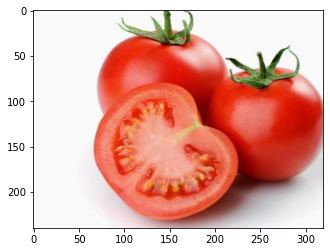

In [53]:
img = cv2.imread('Tomat.jpg')

# resize image (new_widht, new_height)
img_resize = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  

# show image 
plt.imshow(img_resize[:,:,::-1])

In [54]:
img_resize.shape

(240, 320, 3)

- resize multiple image

In [55]:
list(range(len(image_list)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [56]:
resized_list = []

for img in image_list:
    img_resize = cv2.resize(img, (100, 100)) # resize to 100 x 100 pixel
    resized_list.append(img_resize)

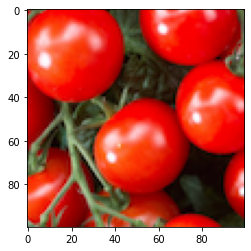

In [59]:
plt.imshow(resized_list[13][:,:,::-1])

### Task 
- tambahkan method ImageResize() ke class Preprocessing agar bisa resize semua gambar
- tambahkan method SaveAllResizedImage() ke class Preprocessing agar bisa menyimpan semua gambar yang di resize ke folder

___

## 3. Image Color Conversion

![](resource/gray_image.png)
- Diperkenalkan method `cv2.cvtColor()` untuk color conversion pada OpenCV
- Berikut adalah parameter convert color  :
    - convert BGR <--> GRAY \
    `cv2.COLOR_BGR2GRAY` \
    `cv2.COLOR_GRAY2RGB` <br><br>
- Convert BGR to RGB Ilustration <br>
    - OpenCV using **Rec. 601 luma** formula to calculate grayscale image :
    $\text{RGB[A] to Gray:} \quad Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$ <br><br>
    <img src="resource/gray_image_2.png" style="width: 400px;"></img><br><br>

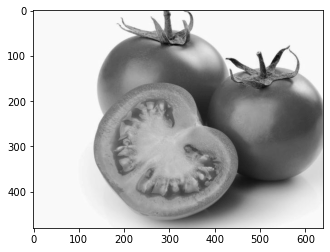

In [60]:
# convert BGR to Gray
img = cv2.imread("Tomat.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show image 
plt.imshow(img_gray, cmap="gray")

- grayscale image shape

In [61]:
img_gray.shape

(480, 640)

In [62]:
img_gray.dtype

dtype('uint8')

In [63]:
img.shape

(480, 640, 3)

- convert grayscale all image dataset

In [64]:
grayscalse_list = []

for img in image_list:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    grayscalse_list.append(img_gray)

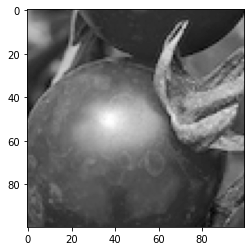

In [74]:
plt.imshow(grayscalse_list[10], cmap="gray")

### Home Work 
- tambahkan method ImageGrayscale() ke class Preprocessing agar bisa convert ke grayscale semua gambar
- tambahkan method SaveAllGrayscaleImage() ke class Preprocessing agar bisa menyimpan semua gambar yang di grayscale ke folder